In [1]:
import pandas as pd

df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


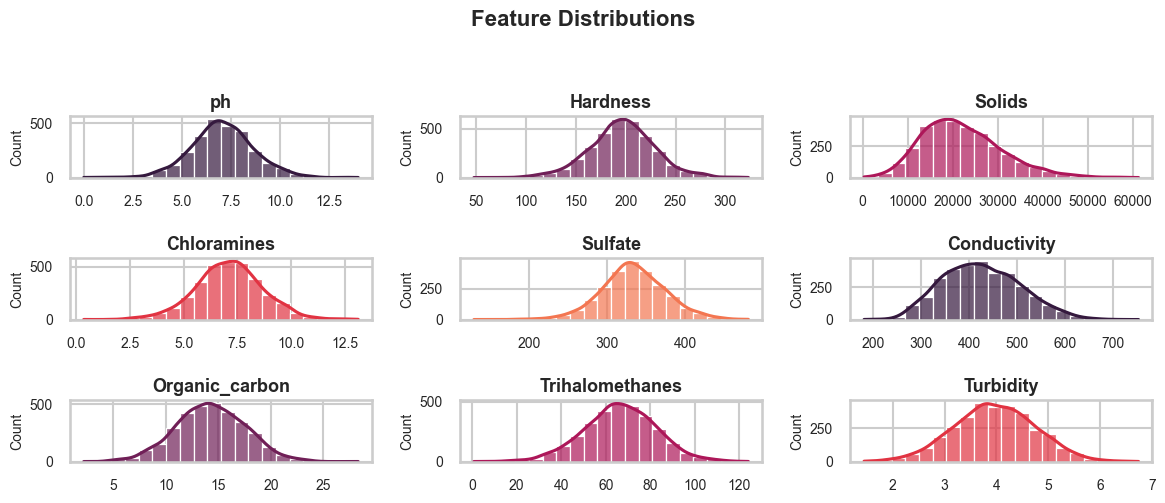

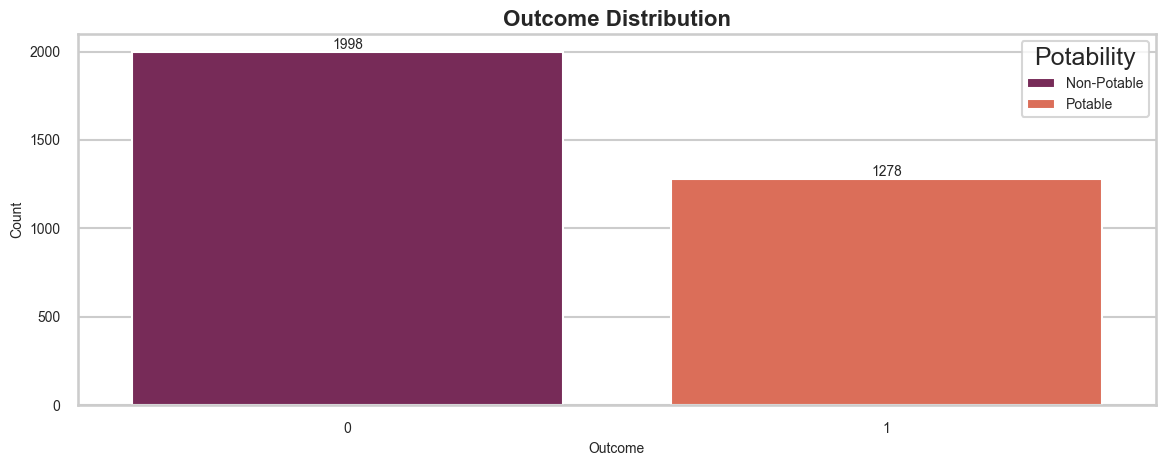

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn theme
sns.set_theme(style="whitegrid", context="talk")

# Split features and target feature Potability
features = [
    "ph",
    "Hardness",
    "Solids",
    "Chloramines",
    "Sulfate",
    "Conductivity",
    "Organic_carbon",
    "Trihalomethanes",
    "Turbidity",
]
y = "Potability"

# Features histograms
fig, axes = plt.subplots(3, 3, figsize=(12, 5))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(
        data=df,
        x=col,
        bins=20,
        kde=True,
        color=sns.color_palette("rocket")[i % 5],
        ax=axes[i],
        alpha=0.7,
    )
    axes[i].set_title(col, fontsize=13, weight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count", fontsize=10)
    axes[i].tick_params(axis="both", which="major", labelsize=10)

fig.suptitle("Feature Distributions", fontsize=16, weight="bold", y=1.02)
plt.tight_layout()
plt.show()

# Target Potability barplot
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x=y, palette="rocket", hue=y)
plt.title("Outcome Distribution", fontsize=16, weight="bold")
plt.xlabel("Outcome", fontsize=10)
plt.ylabel("Count", fontsize=10)
for container in plt.gca().containers:
    plt.bar_label(container, fmt="%d", label_type="edge", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Custom legend
plt.legend(title="Potability", labels=["Non-Potable", "Potable"], fontsize=10)
plt.tight_layout()
plt.show()


### Question 1

From the df.info() output, we observe missing values in the following features:

| Feature             | Population | Missing Values | Missing Percentage |
| :------------------ | :--------: | :------------: | :----------------: |
| **ph**              |    2785    |     **491**    |     **14.98%**     |
| **Sulfate**         |    2495    |     **781**    |      **23.8%**     |
| **Trihalomethanes** |    3114    |     **164**    |       **5%**       |


As shown above, the dataset contains missing values in pH, Sulfate, and Trihalomethanes, with the most significant proportion in Sulfate (~24%) and ph(~15%).

Out of a total of 3,276 records, 1,998 (~61%) belong to the Non-Potable (0) class and 1,278 (~39%) to the Potable (1) class. Although this represents a slight imbalance (around 60/40), both classes are still well represented, so we can consider the dataset to be reasonably balanced for binary classification purposes.

Examining the summary statistics (df.describe()) and the feature distributions through histograms, we find that most features follow similar, non-skewed distributions, suggesting no major outliers or distortions that could bias the analysis.

In summary, the main issue with this dataset is the presence of missing values, particularly in the **pH** and **Sulfate** features. Despite this, the dataset maintains overall good quality for further analysis. Missing values can be effectively handled through interpolation or other imputation techniques. Dropping all missing entries, on the other hand, would result in the loss of over 20% of the available data, which would be more costly to our analysis.

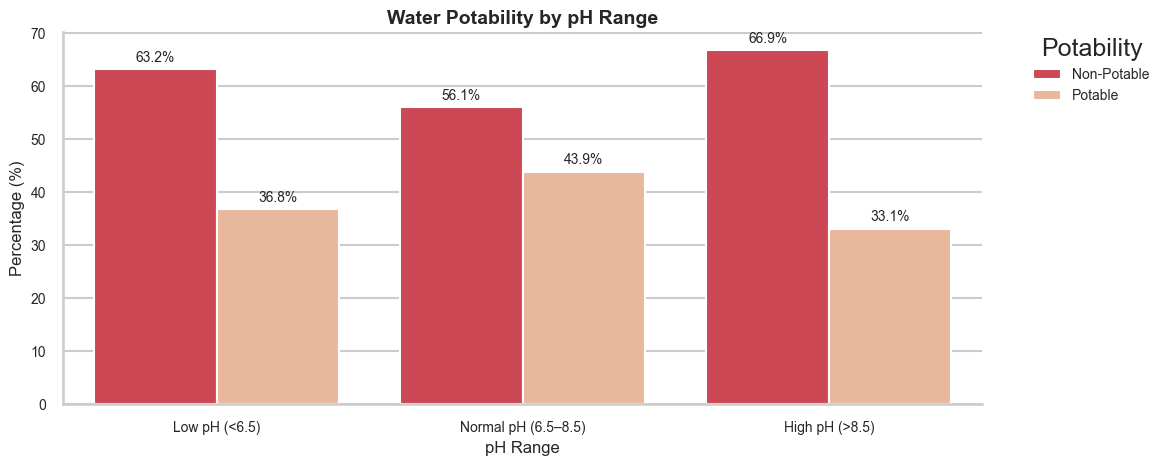

In [5]:
# Define split function
def ph_category(ph):
    if ph < 6.5:
        return "Low pH (<6.5)"
    elif ph <= 8.5:
        return "Normal pH (6.5–8.5)"
    else:
        return "High pH (>8.5)"


# Drop nan values and apply split function
df["ph_range"] = df["ph"].dropna().apply(ph_category)
# Count values and calculate percentages per group
ph_grouped = (
    df.groupby("ph_range")["Potability"].value_counts(normalize=True).mul(100).unstack()
)
# Ensure consistent order of categories
order = ["Low pH (<6.5)", "Normal pH (6.5–8.5)", "High pH (>8.5)"]
ph_grouped = ph_grouped.reindex(order)

# Convert to long format for seaborn
ph_melted = ph_grouped.reset_index().melt(
    id_vars="ph_range", var_name="Potability", value_name="Percentage"
)

# Map potability to labels
ph_melted["Potability_label"] = ph_melted["Potability"].map(
    {0: "Non-Potable", 1: "Potable"}
)

palette = {
    "Non-Potable": sns.color_palette("rocket")[3],
    "Potable": sns.color_palette("rocket")[5],
}
hue_order = ["Non-Potable", "Potable"]

# Create the plot
plt.figure(figsize=(12, 5))
ax = sns.barplot(
    data=ph_melted,
    x="ph_range",
    y="Percentage",
    hue="Potability_label",
    hue_order=hue_order,
    palette=palette,
    order=order,
)
plt.title("Water Potability by pH Range", fontsize=14, weight="bold")
plt.xlabel("pH Range", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Move legend outside the plot
ax.legend(
    title="Potability",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0,
    frameon=False,
    fontsize=10,
)

# Annotate bar values
for rect in ax.patches:
    height = rect.get_height()
    if height > 0:
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            height + 0.8,
            f"{height:.1f}%",
            ha="center",
            va="bottom",
            fontsize=10,
        )

sns.despine()
plt.tight_layout()
plt.show()

df.drop(columns=["ph_range"], inplace=True)

### Question 2
The statement of WHO is that the suggested levels of ph in potable water are **6.5 <= ph <= 8.5**.
From the histogram above we can see that this is not represented at all in our data, since the middle histograms show that the class percentages for ph in range [6.5, 8.5] is 56/44. Surprisingly, this class ratio is the most balanced out of the three ranges that we split the data. Therefore, and since we cannot argue the statements of WHO, we can say that our data either include noisy measurements of ph and ph should be taken into account with caution or that our dataset comes from a biased data collection.

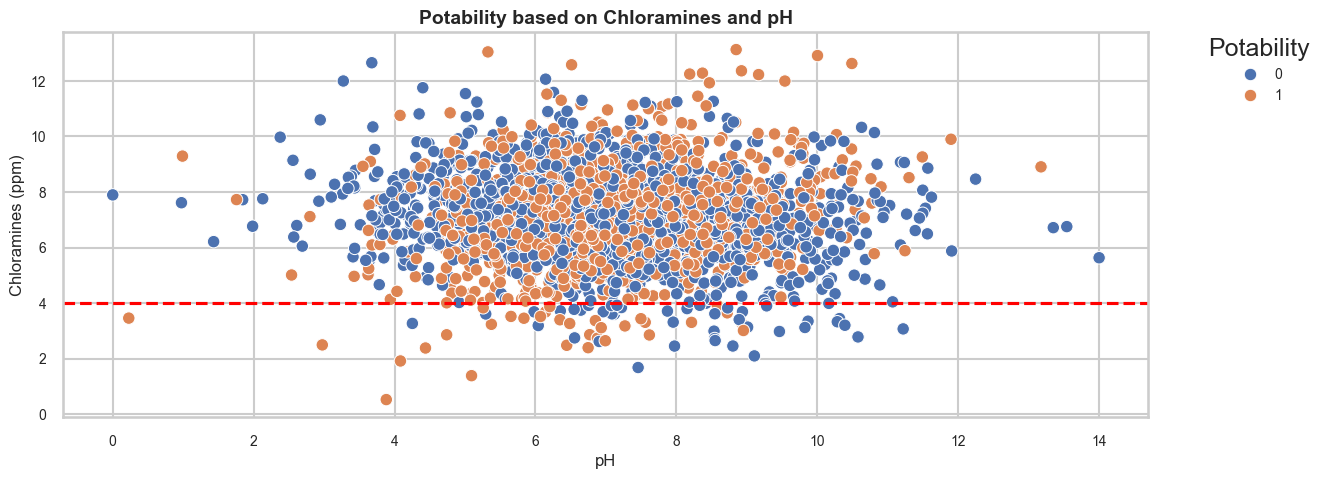

In [6]:
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df, x="ph", y="Chloramines", hue="Potability")
# Move legend outside the plot
plt.legend(
    title="Potability",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0,
    frameon=False,
    fontsize=10,
)
plt.axhline(y=4, color="red", linestyle="--")
plt.title("Potability based on Chloramines and pH", fontsize=14, weight="bold")
plt.xlabel("pH", fontsize=12)
plt.ylabel("Chloramines (ppm)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Question 3
From the plot above, we can see that another statement of WHO is not validated in our data. According to WHO, the suggested Chloramines levels should be up to 4 ppm for Potable water. From the scatterplot we see that most of our data are above the red line at 4 ppm, and there is not a clear separation of Potable/Non-Potable class based on Chloramines. From the comments in Questions 2 & 3, we should reconsider our assumption about the quality of the data given in Question 1 since we see that some domain standards are not satisfied from our dataset.

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Simple Training
input_df = df.drop(columns=["Potability"])
targets_df = df["Potability"]
seed = 0
# Use indices to preserve mapping
indices = input_df.index.to_numpy()
# Split to train/test set
x_train_idx, x_test_idx, y_train, y_test = train_test_split(
    indices, targets_df, test_size=0.3, random_state=seed
)
x_train = input_df.loc[x_train_idx].to_numpy()
x_test = input_df.loc[x_test_idx].to_numpy()
print(f"Train set - Rows: {x_train.shape[0]} - Features: {x_train.shape[1]}")
print(f"Test set - Rows: {x_test.shape[0]} - Features: {x_test.shape[1]}")
# Train model
model = DecisionTreeClassifier(random_state=seed)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Accuracy: {accuracy * 100:.2f} %")

print()

# Training with removed NAs
input_df = df.dropna().drop(columns=["Potability"])
targets_df = df.dropna()["Potability"]
# Use indices to preserve mapping
indices = input_df.index.to_numpy()
# Split to train/test set
x_train_idx, x_test_idx, y_train, y_test = train_test_split(
    indices, targets_df, test_size=0.3, random_state=seed
)
x_train = input_df.loc[x_train_idx].to_numpy()
x_test = input_df.loc[x_test_idx].to_numpy()
print(f"Train set - Rows: {x_train.shape[0]} - Features: {x_train.shape[1]}")
print(f"Test set - Rows: {x_test.shape[0]} - Features: {x_test.shape[1]}")
# Train model
model = DecisionTreeClassifier(random_state=seed)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Dropped NAs Accuracy: {accuracy * 100:.2f} %")

print()

input_df = df.drop(columns=["Potability"])
targets_df = df["Potability"]
# Impute numeric features with class-wise mean
for col in input_df.columns:
    if col == "Potability":
        continue
    # Compute mean per class
    means_per_class = input_df.groupby(targets_df)[col].transform("mean")
    # Fill NA with corresponding class mean
    input_df[col] = input_df[col].fillna(means_per_class)

# Split into train/test set
indices = input_df.index.to_numpy()
x_train_idx, x_test_idx, y_train, y_test = train_test_split(
    indices, targets_df, test_size=0.3, random_state=seed
)
x_train = input_df.loc[x_train_idx].to_numpy()
x_test = input_df.loc[x_test_idx].to_numpy()

print(f"Train set - Rows: {x_train.shape[0]} - Features: {x_train.shape[1]}")
print(f"Test set - Rows: {x_test.shape[0]} - Features: {x_test.shape[1]}")

# Train model
model = DecisionTreeClassifier(random_state=seed)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Class-wise Mean Imputed Accuracy: {accuracy * 100:.2f} %")

Train set - Rows: 2293 - Features: 9
Test set - Rows: 983 - Features: 9
Initial Accuracy: 56.77 %

Train set - Rows: 1407 - Features: 9
Test set - Rows: 604 - Features: 9
Dropped NAs Accuracy: 61.75 %

Train set - Rows: 2293 - Features: 9
Test set - Rows: 983 - Features: 9
Class-wise Mean Imputed Accuracy: 74.77 %


In [8]:
from itertools import product

import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

# Proceed with the dataframe that includes NA values replaced by class-means

# Define parameter grid
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 3, 5],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": [None, "sqrt"],
    "ccp_alpha": [0, 0.01],
}

# Prepare results list
results = []

# Generate all combinations
for params in product(*param_grid.values()):
    criterion, max_depth, min_split, min_leaf, max_feat, ccp = params

    # Initialize model with current parameters
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_split,
        min_samples_leaf=min_leaf,
        max_features=max_feat,
        ccp_alpha=ccp,
        random_state=seed,
    )

    # Fit model
    model.fit(x_train, y_train)

    # Predict on train/test sets
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Compute accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    train_fscore = f1_score(y_train, y_train_pred)
    test_fscore = f1_score(y_test, y_test_pred)

    # Store results
    results.append(
        {
            "criterion": criterion,
            "max_depth": max_depth,
            "min_samples_split": min_split,
            "min_samples_leaf": min_leaf,
            "max_features": max_feat,
            "ccp_alpha": ccp,
            "train_accuracy": train_acc,
            "test_accuracy": test_acc,
            "train_recall": train_recall,
            "test_recall": test_recall,
            "train_precision": train_precision,
            "test_precision": test_precision,
            "train_fscore": train_fscore,
            "test_fscore": test_fscore,
        }
    )

# Convert to DataFrame
decision_tree_results = pd.DataFrame(results)

# Sort by test accuracy descending
decision_tree_results = decision_tree_results.sort_values(
    by="test_accuracy", ascending=False
).reset_index(drop=True)
decision_tree_results


,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_fscore,test_fscore
0,gini,5.0,2,2,None,0.00,0.777148,0.756867,0.493923,0.458445,0.894000,0.822115,0.636299,0.588640
1,gini,5.0,5,1,None,0.00,0.778456,0.753815,0.498343,0.461126,0.893069,0.807512,0.639716,0.587031
2,gini,5.0,5,2,None,0.00,0.777148,0.753815,0.495028,0.458445,0.892430,0.810427,0.636816,0.585616
3,gini,5.0,2,1,None,0.00,0.778892,0.752798,0.498343,0.458445,0.894841,0.806604,0.640170,0.584615
4,entropy,5.0,5,1,None,0.00,0.760140,0.748728,0.412155,0.388740,0.953964,0.884146,0.575617,0.540037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,entropy,3.0,2,2,sqrt,0.01,0.627562,0.614446,0.623204,0.627346,0.523677,0.493671,0.569122,0.552538
92,entropy,5.0,5,1,sqrt,0.01,0.627562,0.614446,0.623204,0.627346,0.523677,0.493671,0.569122,0.552538
93,entropy,5.0,5,2,sqrt,0.01,0.627562,0.614446,0.623204,0.627346,0.523677,0.493671,0.569122,0.552538
94,entropy,NaN,2,2,sqrt,0.01,0.635848,0.611394,0.772376,0.747989,0.526355,0.492063,0.626064,0.593617


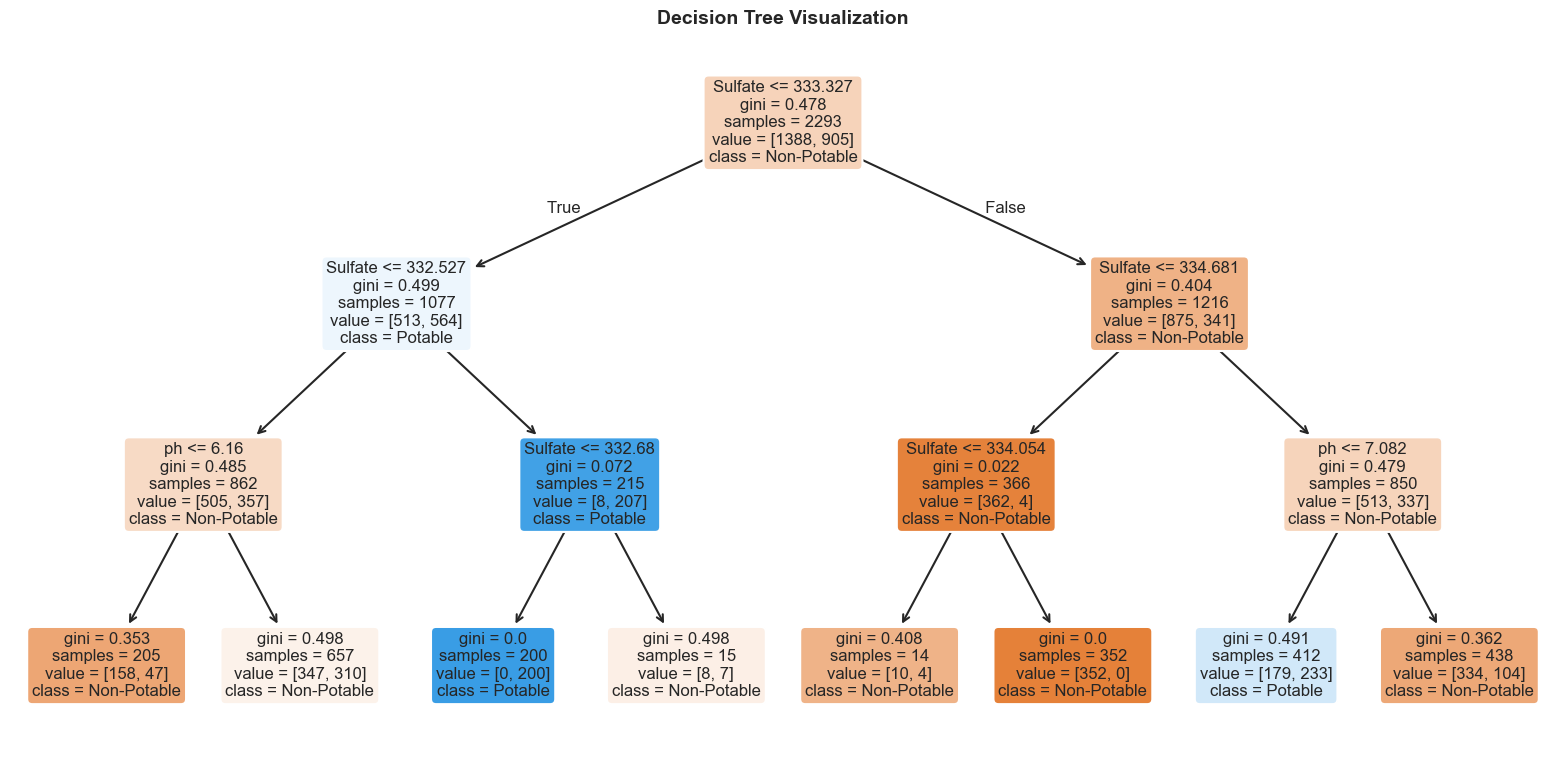

In [9]:
from sklearn.tree import plot_tree

best_params = decision_tree_results.loc[0]
best_params
# Initialize model with current parameters
model = DecisionTreeClassifier(
    criterion=best_params["criterion"],
    max_depth=3,
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_features=best_params["max_features"],
    ccp_alpha=best_params["ccp_alpha"],
    random_state=seed,
)

# Fit model
model.fit(x_train, y_train)

# Predict on train/test sets
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Compute accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_fscore = f1_score(y_train, y_train_pred)
test_fscore = f1_score(y_test, y_test_pred)

# Plot the tree
plt.figure(figsize=(16, 8))
plot_tree(
    model,
    feature_names=input_df.columns,
    class_names=["Non-Potable", "Potable"],
    filled=True,
    rounded=True,
    fontsize=12,
)
plt.title("Decision Tree Visualization", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

In [10]:
from sklearn.tree import export_text

importance = pd.Series(model.feature_importances_, index=input_df.columns).sort_values(
    ascending=False
)
print(importance)

# Export tree rules
tree_rules = export_text(model, feature_names=list(input_df.columns))
print(tree_rules)

Sulfate            0.800623
ph                 0.199377
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.000000
Turbidity          0.000000
dtype: float64
|--- Sulfate <= 333.33
|   |--- Sulfate <= 332.53
|   |   |--- ph <= 6.16
|   |   |   |--- class: 0
|   |   |--- ph >  6.16
|   |   |   |--- class: 0
|   |--- Sulfate >  332.53
|   |   |--- Sulfate <= 332.68
|   |   |   |--- class: 1
|   |   |--- Sulfate >  332.68
|   |   |   |--- class: 0
|--- Sulfate >  333.33
|   |--- Sulfate <= 334.68
|   |   |--- Sulfate <= 334.05
|   |   |   |--- class: 0
|   |   |--- Sulfate >  334.05
|   |   |   |--- class: 0
|   |--- Sulfate >  334.68
|   |   |--- ph <= 7.08
|   |   |   |--- class: 1
|   |   |--- ph >  7.08
|   |   |   |--- class: 0



### Question 7
From the plot and the importance of each feature, we can see that for max-depth=3 the tree utilized only `Sulfate` and `ph` to make its decisions, with `Sulfate` placed on top as the most important feature.

The rules could be interpreted in text like below:
* At first, split the data based on Sulfate. Sulfate <= 333.33 go to the left, and Sulfate > 333.33 go to the right.

* Left Tree
    * If Sulfate <= 332.53:
        * If ph <= 6.16 -> Class Non-Potable
        * If ph > 6.16 -> Class Non-Potable
        * So this subtree results to always Non-Potable
    * If Sulfate  > 332.53:
        * If Sulfate <= 332.68 -> Class Potable
        * If Sulfate > 332.68 -> Class Non-Potable
* Right Tree
    * Sulfate <= 334.681:
        * If Sulfate <= 334.05 -> Class Non-Potable
        * If Sulfate <= 334.05 -> Class Non-Potable
        * So this subtree results to always Non-Potable
    * Sulfate > 334.681:
        * ph <= 7.082 -> Class Potable
        * ph > 7.082 -> Class Non-Potable
        

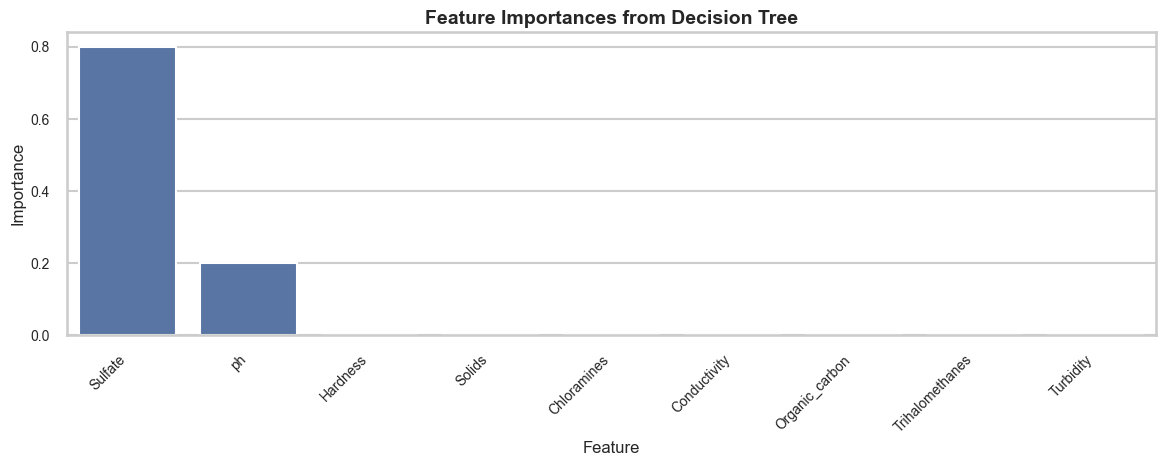

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

importance_sorted = importance.sort_values(ascending=False)

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=importance_sorted.index, y=importance_sorted.values)
# Add title and labels
plt.title("Feature Importances from Decision Tree", fontsize=14, weight="bold")
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance", fontsize=12)
# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### Question 8
If we had to select only 5 features, we would select `Sulfate`, `ph`, `Hardness`, `Chloramines` and `Turbidity`. We clearly see that `Turbidity` has 0 importance so we could move forward with 4 features.

### Question 10
Due to its nature, Random Forest trains multiple trees on randomly generated batches of the dataset. Therefore, it can reduce overfitting to the train data and have increased performance on the test data. Moreover, since each tree is trained on batches of the dataset, it is more robust against missing values that we might have in the dataset like `ph` or `Sulfate`. Also, what is mentioned before will also help utilize more effectively all features instead of givin importance to few features that might be put on top of the Decision Tree and have high influence on the predictions.

In [12]:
from itertools import product

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Proceed with the dataframe that includes NA values replaced by class-means

# Define parameter grid
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 3, 5],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": [None, "sqrt"],
    "ccp_alpha": [0, 0.01],
    "n_estimators": [50, 100, 200],
}

# Prepare results list
results = []

# Generate all combinations
for params in product(*param_grid.values()):
    criterion, max_depth, min_split, min_leaf, max_feat, ccp, n_estimators = params

    # Initialize model with current parameters
    model = RandomForestClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_split,
        min_samples_leaf=min_leaf,
        max_features=max_feat,
        ccp_alpha=ccp,
        random_state=seed,
        n_estimators=n_estimators,
    )

    # Fit model
    model.fit(x_train, y_train)

    # Predict on train/test sets
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Compute accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    train_fscore = f1_score(y_train, y_train_pred)
    test_fscore = f1_score(y_test, y_test_pred)

    # Store results
    results.append(
        {
            "criterion": criterion,
            "max_depth": max_depth,
            "min_samples_split": min_split,
            "min_samples_leaf": min_leaf,
            "max_features": max_feat,
            "ccp_alpha": ccp,
            "train_accuracy": train_acc,
            "test_accuracy": test_acc,
            "train_recall": train_recall,
            "test_recall": test_recall,
            "train_precision": train_precision,
            "test_precision": test_precision,
            "train_fscore": train_fscore,
            "test_fscore": test_fscore,
            "n_estimators": n_estimators,
        }
    )

# Convert to DataFrame
random_forest_results = pd.DataFrame(results)

# Sort by test accuracy descending
random_forest_results = random_forest_results.sort_values(
    by="test_accuracy", ascending=False
).reset_index(drop=True)
random_forest_results


,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_fscore,test_fscore,n_estimators
0,entropy,NaN,5,1,sqrt,0.00,1.000000,0.816887,1.000000,0.656836,1.000000,0.824916,1.000000,0.731343,50
1,gini,NaN,5,1,sqrt,0.00,0.999564,0.814852,0.998895,0.632708,1.000000,0.839858,0.999447,0.721713,200
2,entropy,NaN,5,1,sqrt,0.00,1.000000,0.812818,1.000000,0.632708,1.000000,0.833922,1.000000,0.719512,100
3,gini,NaN,2,2,sqrt,0.00,0.999128,0.812818,0.997790,0.630027,1.000000,0.836299,0.998894,0.718654,200
4,gini,NaN,2,1,sqrt,0.00,1.000000,0.812818,1.000000,0.627346,1.000000,0.838710,1.000000,0.717791,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,gini,3.0,2,2,None,0.01,0.734409,0.727365,0.524862,0.512064,0.726300,0.689531,0.609365,0.587692,100
284,gini,3.0,5,2,None,0.01,0.733973,0.727365,0.521547,0.512064,0.727273,0.689531,0.607465,0.587692,50
285,gini,3.0,2,1,None,0.01,0.734409,0.727365,0.524862,0.512064,0.726300,0.689531,0.609365,0.587692,100
286,gini,3.0,2,1,None,0.01,0.733973,0.727365,0.521547,0.512064,0.727273,0.689531,0.607465,0.587692,50


### Question 12
It is more important that our model always predicts correctly the Non-Potable water and misses some predictions of Potable water. This is easy to understand based on the following:
* If our model always predicts correctly the Non-Potable and sometimes misses predictions of Potable the worst case scenario is to predict something that could be consumpted as Non-Potable and keep it off profuction. The drawback of that is that we would simply lose some sales.
* If our model always predicts correctly the Potable but has misses on the Non-Potable cases, we could missclasify something that would move on to production and eventually be consumpted by someone. The drawbacks of this case are very high, since first of all we could harm people that would drink this water and secondly our company could face legal actions taken against her that would bring in very high costs.

### Question 13
Based on what has been descrbed above and based on the accuracy metrics of the two models, the company should choose the `Random Forest` since it is better in all validation scores, and will lead to better predictions.
A comparison on the test data is shown below for reference.

| **Metric**    |   **Random Forest**   | **Decision Tree** |
| :------------ | :-------------------: | :---------------: |
| **Accuracy**  |       **81.68%**      |       75.68%      |
| **Precision** |       **82.49%**      |       82.21%      |
| **Recall**    |       **65.68%**      |       45.84%      |
| **F1-Score**  |       **73.13%**      |       58.86%      |
